In [53]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [54]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns', inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [56]:
df['target'] = iris.target

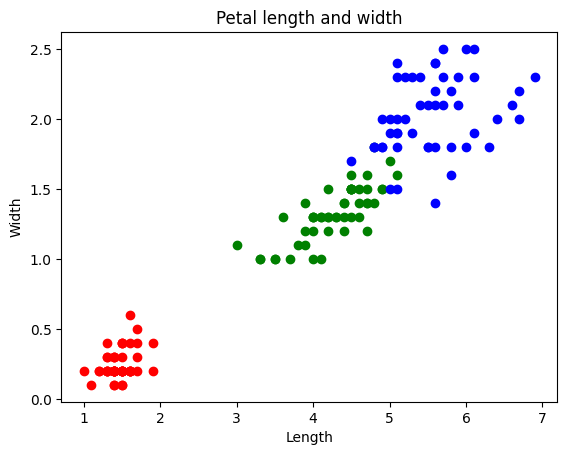

In [57]:
plt.scatter(df[df['target'] == 0]['petal length (cm)'], df[df['target'] == 0]['petal width (cm)'], color='red')
plt.scatter(df[df['target'] == 1]['petal length (cm)'], df[df['target'] == 1]['petal width (cm)'], color='green')
plt.scatter(df[df['target'] == 2]['petal length (cm)'], df[df['target'] == 2]['petal width (cm)'], color='blue')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Petal length and width')
plt.show()

In [58]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])

df['predicted'] = y_pred
df.head()

,petal length (cm),petal width (cm),target,predicted
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1


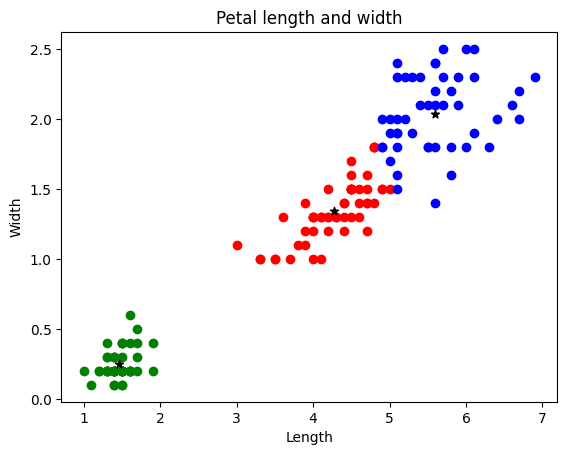

In [59]:
plt.scatter(df[df['predicted'] == 0]['petal length (cm)'], df[df['predicted'] == 0]['petal width (cm)'], color='red')
plt.scatter(df[df['predicted'] == 1]['petal length (cm)'], df[df['predicted'] == 1]['petal width (cm)'], color='green')
plt.scatter(df[df['predicted'] == 2]['petal length (cm)'], df[df['predicted'] == 2]['petal width (cm)'], color='blue')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', color='black')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Petal length and width')
plt.show()

In [60]:
scaler = MinMaxScaler()

scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

df.head()

,petal length (cm),petal width (cm),target,predicted
0,0.067797,0.041667,0,1
1,0.067797,0.041667,0,1
2,0.050847,0.041667,0,1
3,0.084746,0.041667,0,1
4,0.067797,0.041667,0,1


In [61]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])

df['predicted'] = y_pred
df.head()

,petal length (cm),petal width (cm),target,predicted
0,0.067797,0.041667,0,1
1,0.067797,0.041667,0,1
2,0.050847,0.041667,0,1
3,0.084746,0.041667,0,1
4,0.067797,0.041667,0,1


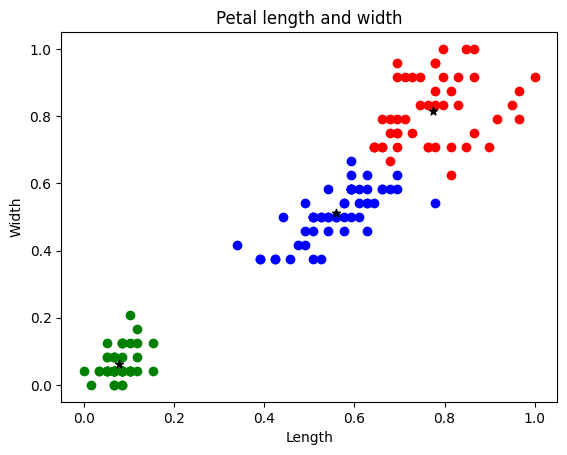

In [62]:
plt.scatter(df[df['predicted'] == 0]['petal length (cm)'], df[df['predicted'] == 0]['petal width (cm)'], color='red')
plt.scatter(df[df['predicted'] == 1]['petal length (cm)'], df[df['predicted'] == 1]['petal width (cm)'], color='green')
plt.scatter(df[df['predicted'] == 2]['petal length (cm)'], df[df['predicted'] == 2]['petal width (cm)'], color='blue')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', color='black')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Petal length and width')
plt.show()

We can see that the unscaled values more closely match the actual target graph, this could be due to its intrinsic inperfection but either way I will put the values back to what they were and then we will draw the elbow graph.

In [64]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns', inplace=True)
df['target'] = iris.target
df.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


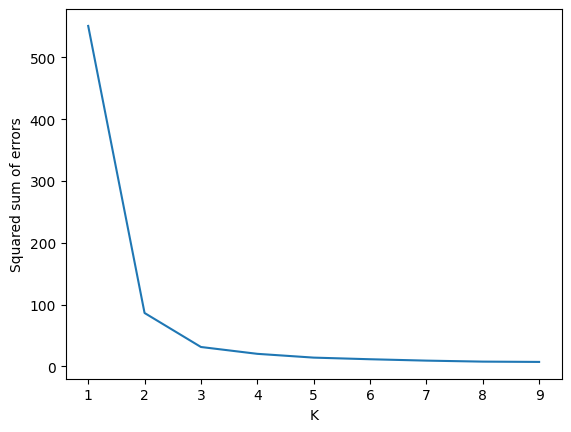

In [65]:
sse = []
for k in range(1, 10):
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

plt.plot(range(1, 10), sse)
plt.xlabel('K')
plt.ylabel('Squared sum of errors')
plt.show()

According to the graph 2 might be the best choice but we know that the actual dataset has 3 target categories.